In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score ,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
clean_df =pd.read_csv('/content/drive/MyDrive/Datasets/PCOS dataset - Sheet1.csv')
clean_df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [3]:
clean_df.shape

(541, 44)

In [4]:
corr =clean_df.corr(numeric_only=True).sort_values('PCOS (Y/N)')
corr

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Cycle length(days),-0.121856,-0.121856,-0.178480,0.055918,-0.002308,0.009536,-0.006232,-0.006290,0.006423,0.005004,...,-0.050418,-0.079600,0.025641,-0.011904,-0.075775,-0.086826,-0.161263,-0.052308,-0.013944,-0.016577
Age (yrs),0.067133,0.067133,-0.168513,1.000000,-0.029734,-0.119819,0.021261,-0.010954,0.045831,0.087382,...,-0.032921,-0.037694,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Marraige Status (Yrs),-0.019416,-0.019416,-0.112897,0.662080,0.043816,-0.066747,0.084000,-0.001795,0.038784,0.077910,...,0.054997,-0.013126,0.059633,0.028831,0.005103,-0.079310,-0.087398,-0.071918,-0.097441,-0.106378
No. of aborptions,-0.107131,-0.107131,-0.057158,0.220794,0.093540,-0.025648,0.109861,-0.053956,0.046087,-0.006433,...,-0.082371,-0.071227,-0.041089,-0.083726,0.071592,-0.057649,-0.078379,-0.056992,-0.117679,-0.066610
PRG(ng/mL),-0.056345,-0.056345,-0.043834,-0.021909,0.069731,0.049741,0.049462,-0.031897,-0.017703,-0.076948,...,-0.058971,-0.037420,0.000308,-0.020737,0.032273,0.018561,0.031535,-0.040770,-0.040933,-0.047707
FSH(mIU/mL),0.016609,0.016609,-0.030319,-0.017794,-0.025750,0.030941,-0.040715,0.028109,-0.013088,-0.032427,...,0.044349,0.040879,-0.023683,-0.026889,0.023375,-0.002291,-0.025318,0.011488,0.020167,-0.048945
I beta-HCG(mIU/mL),-0.015285,-0.015285,-0.027617,0.008148,0.015994,0.062301,-0.009960,-0.035303,-0.020494,-0.085164,...,-0.011253,0.025400,0.039773,-0.081927,0.004346,0.048485,0.018390,0.049893,0.071802,-0.051375
Pregnant(Y/N),0.038878,0.038878,-0.027565,-0.044165,-0.051048,0.046365,-0.073950,-0.070906,0.082542,0.078381,...,0.107326,0.060629,-0.079578,-0.025962,0.022455,0.046257,0.030804,-0.114761,-0.117732,-0.013053
FSH/LH,0.014280,0.014280,-0.018336,0.012464,-0.004844,0.022021,-0.012077,0.036279,-0.013096,-0.043311,...,0.050395,0.045398,-0.029046,-0.019261,0.026828,0.005849,-0.007521,0.014943,0.024077,-0.053737
TSH (mIU/L),-0.073970,-0.073970,-0.010140,0.016740,0.068482,0.013504,0.071379,0.017600,-0.049812,-0.008952,...,-0.000259,-0.047114,-0.004943,0.052301,0.046345,-0.031079,-0.018995,-0.086579,-0.086789,0.005143


In [5]:
clean_df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [6]:
clean_df.dropna()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [7]:
clean_df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [8]:
if clean_df['Fast food (Y/N)'].isnull().any():
  print('yes')

yes


In [9]:
clean_df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(clean_df['II    beta-HCG(mIU/mL)'], errors='coerce')
clean_df['AMH(ng/mL)'] = pd.to_numeric(clean_df['AMH(ng/mL)'], errors='coerce')
clean_df = clean_df.astype(float)

In [10]:
2

2

In [11]:
for col in clean_df.columns:
    try:
        clean_df[col].astype(float)
    except ValueError as e:
        print(f"Column '{col}' contains non-numeric values: {e}")

In [12]:
clean_df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [13]:
clean_df = clean_df.dropna(axis=1)
display(clean_df.head())

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Hair loss(Y/N),Pimples(Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,0.0,0.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,1.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0


In [14]:
clean_df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [15]:
# Sl. No	0
# Patient File No.

SyntaxError: invalid syntax (ipython-input-1208744301.py, line 1)

In [16]:
target = 'PCOS (Y/N)'
corr = clean_df.corr()[target].sort_values(ascending=False)
columns_to_drop = ['Sl. No', 'Patient File No.']
clean_df = clean_df.drop(columns=columns_to_drop)

In [17]:
print(corr[abs(corr) > 0.2])

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Pimples(Y/N)            0.286077
Weight (Kg)             0.211938
Name: PCOS (Y/N), dtype: float64


IndexError: Inconsistent shape between the condition and the input (got (40, 1) and (40,))

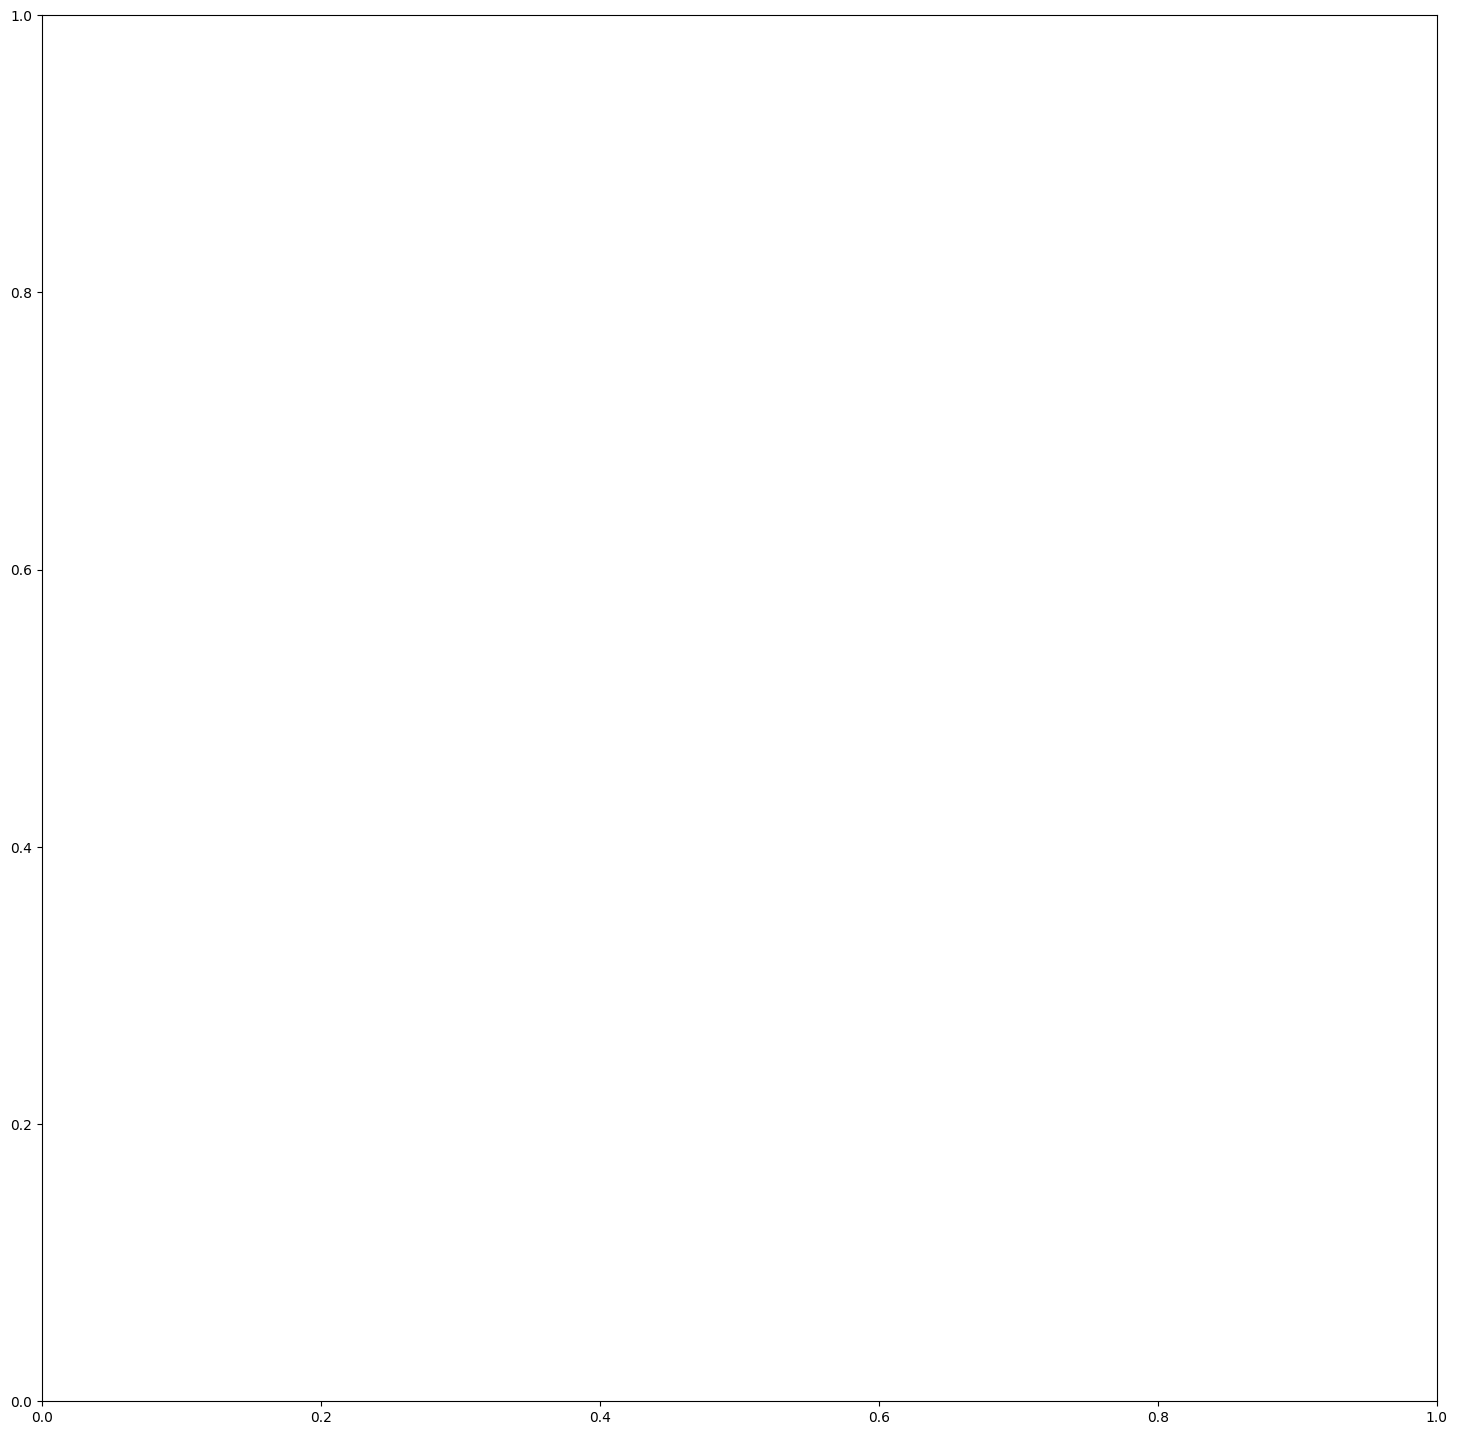

In [18]:
plt.subplots(figsize=(18,18))
sns.heatmap(  corr, annot=True,cmap="coolwarm", square=True)

In [19]:
selected_columns = [
    'PCOS (Y/N)',
    'Follicle No. (R)',
    'Follicle No. (L)',
    'Skin darkening (Y/N)',
    'hair growth(Y/N)',
    'Weight gain(Y/N)',
    'Cycle(R/I)',
    'Pimples(Y/N)',
    'Weight (Kg)'
]

df_selected = clean_df[selected_columns].copy()
display(df_selected.head())

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Pimples(Y/N),Weight (Kg)
0,0.0,3.0,3.0,0.0,0.0,0.0,2.0,0.0,44.6
1,0.0,5.0,3.0,0.0,0.0,0.0,2.0,0.0,65.0
2,1.0,15.0,13.0,0.0,0.0,0.0,2.0,1.0,68.8
3,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,65.0
4,0.0,4.0,3.0,0.0,0.0,0.0,2.0,0.0,52.0


In [20]:
X_train = df_selected.drop('PCOS (Y/N)', axis=1)
y_train = df_selected['PCOS (Y/N)']

Imbalance In the Dataset

In [21]:
df_selected['PCOS (Y/N)'].value_counts(normalize =True)*100

,proportion
PCOS (Y/N),
0.0,67.28281
1.0,32.71719


MODEL NO SMOTE

In [22]:
x_train , x_test ,y_train ,y_test=train_test_split(X_train,y_train,train_size=0.2,random_state=42)

In [23]:
scaled =StandardScaler()
xtrain_scaled =scaled.fit_transform(x_train)
xtest_scaled =scaled.transform(x_test)

In [24]:
log_reg=LogisticRegression()
rf_clf=RandomForestClassifier()

In [25]:
log_reg=LogisticRegression()
log_reg.fit(xtrain_scaled, y_train)
rf_clf=RandomForestClassifier()
rf_clf.fit(xtrain_scaled, y_train)

RandomForestClassifier()

In [26]:
# Make predictions on the scaled test set
y_pred_log_reg = log_reg.predict(xtest_scaled)
y_pred_rf_clf = rf_clf.predict(xtest_scaled)

# Evaluate Logistic Regression model
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1-score:", f1_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))


# Evaluate Random Forest model
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_clf))
print("Recall:", recall_score(y_test, y_pred_rf_clf))
print("F1-score:", f1_score(y_test, y_pred_rf_clf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_clf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_clf))

Logistic Regression Model Evaluation:
Accuracy: 0.8891454965357968
Recall: 0.7659574468085106
F1-score: 0.8181818181818182
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       292
         1.0       0.88      0.77      0.82       141

    accuracy                           0.89       433
   macro avg       0.89      0.86      0.87       433
weighted avg       0.89      0.89      0.89       433

Confusion Matrix:
 [[277  15]
 [ 33 108]]

Random Forest Model Evaluation:
Accuracy: 0.8983833718244804
Recall: 0.7446808510638298
F1-score: 0.8267716535433071
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       292
         1.0       0.93      0.74      0.83       141

    accuracy                           0.90       433
   macro avg       0.91      0.86      0.88       433
weighted avg       0.90      0.90      0.90       433

Confusion Matri

MODEL WITH SMOTE


In [27]:
smote_df =df_selected.copy()

In [28]:
smote_df.head()

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Pimples(Y/N),Weight (Kg)
0,0.0,3.0,3.0,0.0,0.0,0.0,2.0,0.0,44.6
1,0.0,5.0,3.0,0.0,0.0,0.0,2.0,0.0,65.0
2,1.0,15.0,13.0,0.0,0.0,0.0,2.0,1.0,68.8
3,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,65.0
4,0.0,4.0,3.0,0.0,0.0,0.0,2.0,0.0,52.0


In [29]:
smote_df['PCOS (Y/N)'].value_counts(normalize=True)*100

,proportion
PCOS (Y/N),
0.0,67.28281
1.0,32.71719


In [30]:
from collections import Counter


In [31]:
from imblearn.over_sampling import SMOTE

In [33]:
sm =SMOTE(sampling_strategy='minority')

# Task
Apply SMOTE to the training data, train Logistic Regression and Random Forest models on the SMOTE-augmented data, evaluate their performance on the original test set, and compare the results to models trained without SMOTE.

## Apply smote

### Subtask:
Apply SMOTE to the training data (`xtrain_scaled` and `y_train`) to create a balanced dataset.


**Reasoning**:
Apply SMOTE to the scaled training data to address class imbalance.



In [34]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(xtrain_scaled, y_train)
print(f"Original dataset shape {Counter(y_train)}")
print(f"Resampled dataset shape {Counter(y_train_smote)}")

Original dataset shape Counter({0.0: 72, 1.0: 36})
Resampled dataset shape Counter({0.0: 72, 1.0: 72})


**Reasoning**:
Import the Counter class to count the occurrences of each class in the target variable.



In [35]:
from collections import Counter

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(xtrain_scaled, y_train)
print(f"Original dataset shape {Counter(y_train)}")
print(f"Resampled dataset shape {Counter(y_train_smote)}")

Original dataset shape Counter({0.0: 72, 1.0: 36})
Resampled dataset shape Counter({0.0: 72, 1.0: 72})


## Train models with smote

### Subtask:
Train the Logistic Regression and Random Forest models using the SMOTE-augmented training data.


**Reasoning**:
Instantiate Logistic Regression and Random Forest models and train them on the SMOTE-augmented training data.



In [36]:
log_reg_smote = LogisticRegression()
rf_clf_smote = RandomForestClassifier()

log_reg_smote.fit(X_train_smote, y_train_smote)
rf_clf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

## Evaluate models with smote

### Subtask:
Evaluate the performance of the models trained on the SMOTE data using the original test set (`xtest_scaled` and `y_test`) and compare the results to the models trained without SMOTE.


**Reasoning**:
Make predictions using the SMOTE-trained models on the test set and evaluate their performance using various metrics.



In [37]:
# Make predictions on the scaled test set using SMOTE-trained models
y_pred_log_reg_smote = log_reg_smote.predict(xtest_scaled)
y_pred_rf_clf_smote = rf_clf_smote.predict(xtest_scaled)

# Evaluate Logistic Regression model trained with SMOTE
print("Logistic Regression Model Evaluation (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_smote))
print("Recall:", recall_score(y_test, y_pred_log_reg_smote))
print("F1-score:", f1_score(y_test, y_pred_log_reg_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg_smote))

# Evaluate Random Forest model trained with SMOTE
print("\nRandom Forest Model Evaluation (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_clf_smote))
print("Recall:", recall_score(y_test, y_pred_rf_clf_smote))
print("F1-score:", f1_score(y_test, y_pred_rf_clf_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_clf_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_clf_smote))

Logistic Regression Model Evaluation (with SMOTE):
Accuracy: 0.8914549653579676
Recall: 0.8014184397163121
F1-score: 0.8278388278388278
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       292
         1.0       0.86      0.80      0.83       141

    accuracy                           0.89       433
   macro avg       0.88      0.87      0.87       433
weighted avg       0.89      0.89      0.89       433

Confusion Matrix:
 [[273  19]
 [ 28 113]]

Random Forest Model Evaluation (with SMOTE):
Accuracy: 0.8729792147806005
Recall: 0.7730496453900709
F1-score: 0.7985347985347986
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.91       292
         1.0       0.83      0.77      0.80       141

    accuracy                           0.87       433
   macro avg       0.86      0.85      0.85       433
weighted avg       0.87      0.87      0.87 